<p style="text-align: center; font-size: 400%">Devoir MTH2302D </p>

<p style="text-align: center; font-size: 120%">Julien Roux 2060886  
- Sébastien Roy </p>

### Phase 1

On charge les données depuis le csv en fonction du matricule.

In [2]:
matricule <- 2060886

In [8]:
charger <- function(matricule) {
  set.seed(matricule)
  mondata <- read.csv2("DevoirDH23.csv")[sample(290,195),-1]
}

In [11]:
mondata <- charger(matricule)
mondata[1:5,]

,Sales,Price,Advertising,Region
,<dbl>,<int>,<int>,<int>
25,5.58,148,10,1
181,12.61,104,10,0
202,9.48,132,10,0
129,5.87,109,0,1
289,3.02,90,11,0


On charge toutes les données depuis le csv.

In [13]:
alldata <- read.csv2("DevoirDH23.csv")
alldata[1:5,]

,NUM,Sales,Price,Advertising,Region
,<int>,<dbl>,<int>,<int>,<int>
1,142,5.40,163,13,0
2,104,7.99,99,0,1
3,103,4.21,137,14,0
4,274,4.34,111,0,0
5,286,6.42,126,5,1


### a)

In [14]:
Ventes <- alldata$Sales
# Ventes[1:100]

#### Histogramme du nombre de ventes de siège automobiles

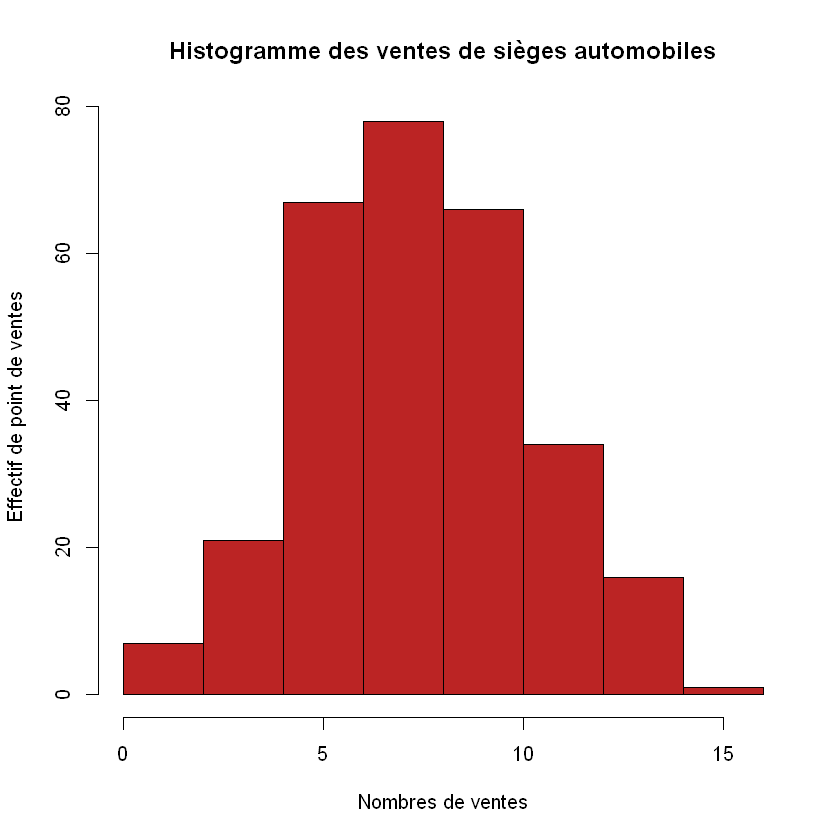

In [15]:
hist(Ventes, col="#bb2424",main="Histogramme des ventes de sièges automobiles",
     border="#000000", xlab="Nombres de ventes",ylab="Effectif de point de ventes")

Ce graphique montre que la majorité des points de vente ont vendu entre 5 et 10 sièges automobiles.  
` `  
` `  

#### Box plot du nombre de ventes de siège automobiles

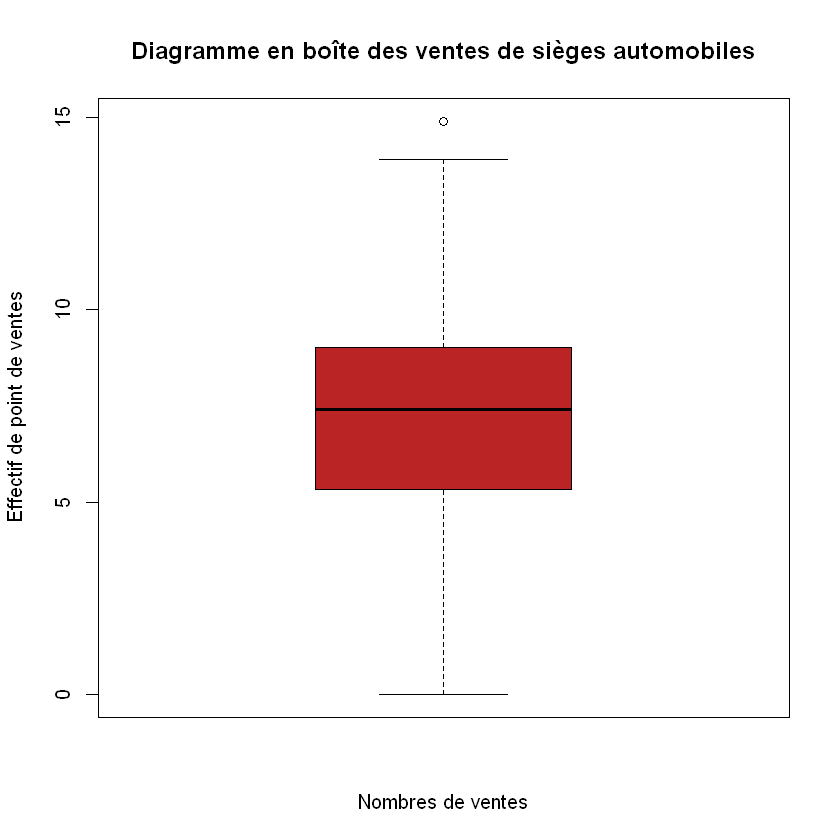

In [16]:
boxplot(Ventes, col="#bb2424",main="Diagramme en boîte des ventes de sièges automobiles",
        border="#000000", xlab="Nombres de ventes",ylab="Effectif de point de ventes")

Ce graphique montre que la moiter des points de vente ont vendu entre 5 et 10 sièges automobiles et que la médiane est d'environ 7,5.  
` `  
` `  

#### Droite de Henry du nombre de ventes de siège automobiles

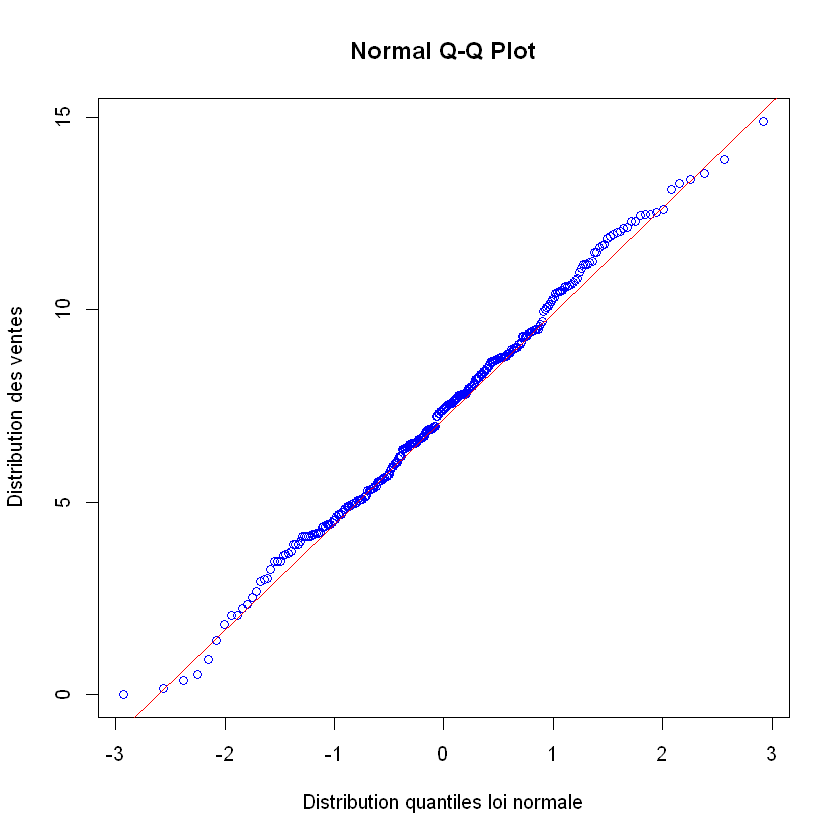

In [17]:
qqnorm(Ventes,col="blue", xlab="Distribution quantiles loi normale",ylab="Distribution des ventes")
qqline(Ventes,col="red")

Les données de ventes semblent suivre une droite de Henry. On peut alors dire que la loi normale est une bonne approximation de la distribution des ventes de sièges automobiles.   
` `  
` `  

#### Test de normalité du nombre de ventes de siège automobiles

$H_0$: Les données suivent une loi normale  
$H_1$: Les données ne suivent pas une loi normale  

In [18]:
shapiro.test(Ventes)


	Shapiro-Wilk normality test

data:  Ventes
W = 0.99568, p-value = 0.6051


Comme W = 0.99568 n'est pas petit et que p-value = 0.6051 n'est pas petit, on ne rejette pas $H_0$.  
Ainsi le test de normalité montre que les données suivent une loi normale.  
` `  
` `    


#### Tableau de statistiques descriptives du nombre de ventes de siège automobiles

Utilisation d'une librarie de R pour le calcule de l'intervalle de confiance à 95% pour la moyenne.

In [71]:
library(KefiR)
cat('La marge d\'erreur est ', int.pop(Ventes, 0.95))

La marge d'erreur est  0.3195956

Caclule de l'intervalle de confiance à 95% pour la moyenne détailé.

In [69]:
cat('La moyenne des ventes est :', mean(Ventes))
cat('\nLa variance des ventes est :', var(Ventes))
cat('\nTaille de la population : n =', length(Ventes))

La moyenne des ventes est : 7.343345
La variance des ventes est : 7.71087
Taille de la population : n = 290

Calcul intervale de confiance à 95% (1 - $\alpha$ = 0.95) pour la moyenne de la population.  
$\bar{X}$ = 7.343 et $\sigma^2$ = 7.71, de plus Ventes ~ N($\mu$, $\sigma^2$).  
On a donc: $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ ~ N(0, 1) soit $\mu \in \bar{X} \pm z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$  
` `  
Calcul $z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$

In [34]:
z <- qnorm(0.025, 0, 1, lower.tail = FALSE) * sqrt(var(Ventes)/length(Ventes))
cat('\nLa marge d\'erreur est :', z)



La marge d'erreur est : 0.3195956

On à donc: $\mu \in \bar{X} \pm 0.3195956$ soit $\mu \in [7.023404, 7.662596]$ à 95%.    
` `  
` `

Tableau de statistiques :

In [70]:
stat <- matrix(c(
    summary(Ventes)[['1st Qu.']],
    summary(Ventes)[['Median']],
    summary(Ventes)[['Mean']],
    sqrt(var(Ventes)),
    summary(Ventes)[['3rd Qu.']],
    paste("[", 7.023404, ", ",  7.662596, "]", sep = "")),
    ncol=6,
    nrow=1,
    byrow=TRUE)

colnames(stat) <- c('1er Quartile','Médiane','Moyenne','Écart type', '3e Quartile', 'Intervale de confiance')
stat

1er Quartile,Médiane,Moyenne,Écart type,3e Quartile,Intervale de confiance
5.3225,7.415,7.34334482758621,2.77684534828552,9.025,"[7.023404, 7.662596]"
